# Fraud Analytics using Python


* Introduction to fraud detection
    * Reading the data labels
    * Data resampling and plotting
    * Applying SMOTE
    * Logistic regression with SMOTE 
* Using ML classification to catch fraud and monitoring the right performance metrics
    * Random forest classifier
    * Performance of RF classifier
    * Plotting precision recall curve  
* Performing model adjustments and regression analysis
    * GridSearchCV to find optimal parameters
    * Logistic regression
    * Voting classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory analysis

In [2]:
# reading the CSV file
df = pd.read_csv("data/data_creditcard.csv")
df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Check the features available in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#Calculate the number of fraud and non fraud
occ = df['Class'].value_counts()
occ

0    284315
1       492
Name: Class, dtype: int64

In [5]:
#Ratio of the true fraud cases
print(occ / len(df))

0    0.998273
1    0.001727
Name: Class, dtype: float64


## Visualizing the data 


Text(0, 0.5, 'Frequency')

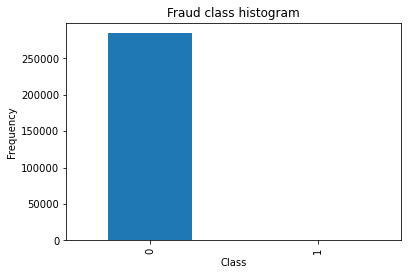

In [6]:
#Display fraud and none fraud in a bar chart
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")


In [7]:
def prep_data(df):
    
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float) # features array and converting the values to float
    y = df.iloc[:, 30]
    y = np.array(y).astype(np.float) # target variable - class and converting the values to float
    return X,y


def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

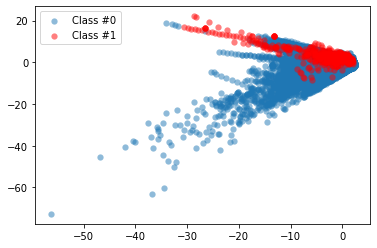

In [8]:

# Create X and y from the prep_data function 
X, y = prep_data(df)

# Plot the data 
plot_data(X, y)


In [9]:
df.iloc[0].count

<bound method Series.count of Time        0.000000
V1         -1.359807
V2         -0.072781
V3          2.536347
V4          1.378155
V5         -0.338321
V6          0.462388
V7          0.239599
V8          0.098698
V9          0.363787
V10         0.090794
V11        -0.551600
V12        -0.617801
V13        -0.991390
V14        -0.311169
V15         1.468177
V16        -0.470401
V17         0.207971
V18         0.025791
V19         0.403993
V20         0.251412
V21        -0.018307
V22         0.277838
V23        -0.110474
V24         0.066928
V25         0.128539
V26        -0.189115
V27         0.133558
V28        -0.021053
Amount    149.620000
Class       0.000000
Name: 0, dtype: float64>

In [10]:
df.shape

(284807, 31)

## Techniques used to manage imbalanced data


* `Random Under Sampling(RUS)`: This reduces the majority class and makes the data balanced.
* `Random Over Sampling(ROS)`: This generated duplicates of the minority class. Inefficient because of duplicacy.
* `Synthetic Minority Oversampling Technique(SMOTE)`: Generates fake realistic data to balance out the data.


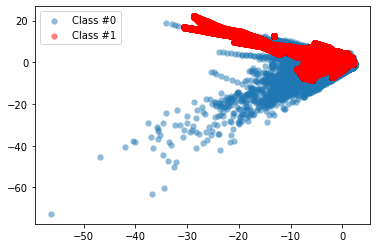

In [11]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
X, y = prep_data(df) # preparing the data

method = SMOTE() # invoking the resampling method

X_resampled, y_resampled = method.fit_sample(X,y) # creating the resampled feature set

plot_data(X_resampled, y_resampled)

In [12]:
pd.value_counts(y_resampled)

1.0    284315
0.0    284315
dtype: int64

In [13]:
def compare_plot(X,y,X_resampled,y_resampled, method):
    # Start a plot figure
    f, (ax1, ax2) = plt.subplots(1, 2)
    
    # sub-plot number 1, this is for initial data
    c0 = ax1.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0",alpha=0.5)
    c1 = ax1.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1",alpha=0.5, c='r')
    ax1.set_title('Original set')
    
    # sub-plot number 2, this is for oversampled data
    ax2.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=.5)
    ax2.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=.5,c='r')
    ax2.set_title(method)
        
    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
                  ncol=2, labelspacing=0.)
    plt.tight_layout(pad=3)
    return plt.show()

0.0    284315
1.0       492
dtype: int64
1.0    284315
0.0    284315
dtype: int64


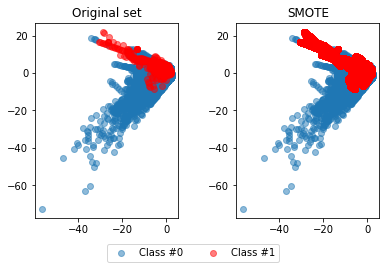

In [14]:
# Print the value_counts on the original labels y
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

# Run compare_plot
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')


## Rule-based method to detect fraudsters

In [15]:
# Get the mean for each group
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [17]:
# Implement a rule for cases which are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5), 1, 0)

pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud'])

Flagged Fraud,0,1
Actual Fraud,,
0,283089,1226
1,322,170


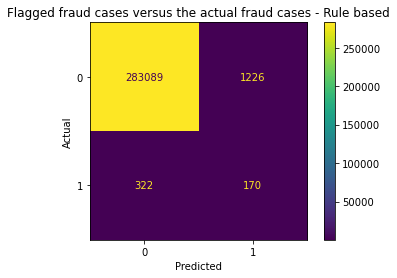

In [18]:
# Create a confusion matrix plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
   
cm = confusion_matrix(df.Class, df.flag_as_fraud)

cmd_obj =  ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Flagged fraud cases versus the actual fraud cases - Rule based', 
                xlabel='Predicted', 
                ylabel='Actual')
plt.show()



## Using ML classification to catch fraudsters

### Logistic regression

In [20]:
# importing sklearn for training splitting and importing the classifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



In [21]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model 
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.89      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.95      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85285    11]
 [   56    91]]


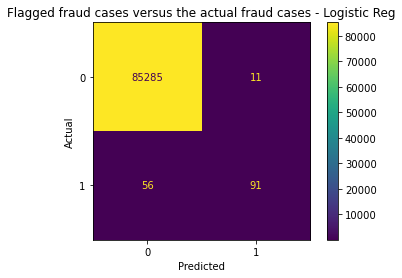

In [22]:
#Create plot for confusion matrix used for logistic Reg with test data
cmd_obj =  ConfusionMatrixDisplay(conf_mat, display_labels=['0', '1'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Flagged fraud cases versus the actual fraud cases - Logistic Reg', 
                xlabel='Predicted', 
                ylabel='Actual')
plt.show()


## Logistic regression combined with SMOTE

Combine that with a SMOTE resampling method. Also initiation of the pipeline that combines the resampling method with the model 

In [23]:
# Build the pipeline for module
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import ClusterCentroids

# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE(kind='borderline-2')
#resampling2 = RandomUnderSampler()
#resampling3 = RandomOverSampler()
#resampling4 = ClusterCentroids()
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)]) # SMOTE
#pipeline = Pipeline([('RUS', resampling2), ('Logistic Regression', model)]) #Random UnderSampler
#pipeline = Pipeline([('ROS', resampling3), ('Logistic Regression', model)]) #Random OverSampler
#pipeline = Pipeline([('CC', resampling4), ('Logistic Regression', model)]) #ClusterCentroid

In [82]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     85296
         1.0       0.09      0.86      0.16       147

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.57     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83951  1345]
 [   20   127]]


## Fraud detection using labelled data


### Natural hit rate

In [45]:
# Count the total number of observations from the length of y
total_obs = len(y)

# Count the total number of non-fraudulent observations 
non_fraud = [i for i in y if i == 0]
count_non_fraud = non_fraud.count(0)

# Calculate the percentage of non fraud observations in the dataset
percentage = (float(count_non_fraud)/float(total_obs)) * 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print(percentage)

99.82725143693798


## Random forest classifier 

In [86]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

model = RandomForestClassifier(random_state=5)

In [84]:
X_test.shape, y_test.shape


((85443, 28), (85443,))

In [95]:
# Fit the model to training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score

# Print the accuracy performance metric
print(accuracy_score(y_test, predicted))

0.9991456292499094


## Performance metrics for the RF model


In [98]:
# Import the packages to get the different performance metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Print the AUCROC curve, classification report and confusion matrix
print(classification_report(y_test, predicted))

print(confusion_matrix(y_test, predicted, labels=[0, 1]))

print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.76      0.73      0.75       147

    accuracy                           1.00     85443
   macro avg       0.88      0.87      0.87     85443
weighted avg       1.00      1.00      1.00     85443

[[85262    34]
 [   39   108]]
AUC ROC score:  0.8671476328291586


In [102]:
probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [105]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predicted)

In [106]:
false_positive_rate


array([0.00000000e+00, 3.98611893e-04, 1.00000000e+00])

In [107]:
true_positive_rate

array([0.        , 0.73469388, 1.        ])

In [108]:
threshold

array([2., 1., 0.])

In [110]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', n_estimators=100, random_state=5)###################################

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the roc_auc_score, the classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9407653396192468
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.97      0.76      0.85       147

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85292     4]
 [   36   111]]


## Adjusting the RM to fraud detection

In [111]:
def get_model_results(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    print (classification_report(y_test, predicted))
    print (confusion_matrix(y_test, predicted))

In [92]:
# Change the model options
model = RandomForestClassifier(bootstrap=True, 
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud 
                               criterion='entropy',
                               
                               # Change depth of model
                               max_depth=10,
                               
                               # Change the number of samples in nodes
                               min_samples_leaf=10, 
                               
                               # Change the number of trees to use
                               n_estimators=20, 
                               
                               n_jobs=-1, random_state=5)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.91      0.82      0.86       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.95      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443

[[85284    12]
 [   27   120]]


## Decision Tree Classifier

In [124]:
# Import the Decission Tree model from sklearn
from sklearn.tree import DecisionTreeClassifier

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

model = DecisionTreeClassifier(random_state=5, class_weight="balanced")

In [125]:
# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

In [126]:
# Print the accuracy performance metric
print(accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9991456292499094
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.76      0.73      0.75       147

    accuracy                           1.00     85443
   macro avg       0.88      0.87      0.87     85443
weighted avg       1.00      1.00      1.00     85443

[[85262    34]
 [   39   108]]
